In [14]:
from __future__ import division
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [15]:
df = pd.read_csv('formatted_data_updated.csv')

df = df.replace('?', np.nan)
#print df
newdf = df.drop('UserID', axis = 1)
newdf

,Cajun Oven Baked Pork Chops,Chocolatey Overnight Oats with Strawberries,Baked Alaska,Decadent Black Forest Cake,Chocolate Chip Peanut Butter Banana Cookies,Coconut Cream Pie Vegan Milkshake,Protein Packed Carrot Muffins,Square Deviled Eggs,Baked Honey Sriracha Chicken Wings,Cheese Tortellini With Shrimp In Tomato Cream Sauce,...,Easy Pork Chops on Stuffing,Baked Pears with Oatmeal Crumble,Loaded Baked Potato Soup with Crispy-Fried Potato Skins,Mexican Casserole,Alouette Chicken Paprika,Homemade Animal Crackers,4 Ingredient Raw Peanut Butter Chocolate Cups,Cherry Blueberry Muffins,Drunken Noodles (Pad Kee Mao),Baked Tofu Cheesecake
0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
training_set = newdf[0:31]

test_set = newdf[31:37]


Adding all of the ratings corresponding to each recipe in a list of lists to make computation easier.

In [17]:
def makeArrays(dataframe): 
    recipeRatings = []
    #print recipeRatings
    for col in dataframe:
        lists = []
        for val in dataframe[col]:
            lists.append(val) 
        recipeRatings.append(lists)
    #print recipeRatings
    return recipeRatings

def averages(array):
    i = 0
    for ratings in array:
        sums = 0
        count = 1
        for rating in ratings:

            if(not math.isnan(rating)):
                sums  = sums + rating
                count = count +1
            average = float(sums/count)
            #print average
            array[i] = [average if math.isnan(x) else float(x) for x in array[i]]
        i = i+1

    #returns a numpy array
    return np.array(array)

In [18]:
#compute the averages of the row
def averages(row):
    #instantiate our variables
    avg = float(0)
    counter = float(1)

    #iterate over the cols in the row
    for col in row:
        if not np.isnan(float(col)):
            avg += float(col)
            counter += 1
    #compute the average
    return (avg/counter)


In [19]:
#initlize list of lists for spectral
training_data = []

for index, row in newdf.iterrows():
    #preprocessing for every row
    avg = averages(row)
    #initlize rows
    rows = []
    #for each col in row
    for col in row:
        #cast to float for nan behavior
        col = float(col)
        #if missing data
        if np.isnan(col):
            rows.append(avg)
        #not missing data
        else:
            rows.append(col)

    training_data.append(rows)

#cast to np array for fun times
training_data = np.array(training_data)


# K-means

#run PCA to reduce the data dimensionality so that it is easier to visualize
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(training_data)

In [20]:
#training_data = averages(makeArrays(training_set.T))
#print training_set.shape
kmeans = KMeans(n_clusters=4, random_state=0).fit(training_data)

set([0, 1, 2, 3])


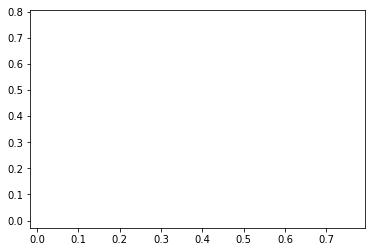

In [21]:
labels_kmeans = kmeans.labels_
set_lk = set(labels_kmeans)
print set_lk
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.show()

test_data = averages(makeArrays(test_set.T))
kmeans.predict(test_data)
kmeans.score(test_data)


# Spectral clustering

In [22]:
spectral = SpectralClustering()
spectral.fit(training_data)
print "lables from clustering"
spectral_labels =  spectral.labels_
set_ls = set(spectral_labels)

lables from clustering


# Hierarchial/Agglomerative Clustering

In [23]:
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(training_data, n_neighbors=10, include_self=False)

In [24]:
ward = AgglomerativeClustering(n_clusters=8, connectivity=connectivity,
                               linkage='ward').fit(training_data)

In [27]:
h_labels = ward.labels_
print h_labels
set_lh = set(h_labels)

[2 3 1 1 3 3 7 3 7 5 0 2 1 3 0 5 0 0 1 3 1 3 4 0 0 3 5 5 6 0 0 3 3 1 1 7 1
 0]


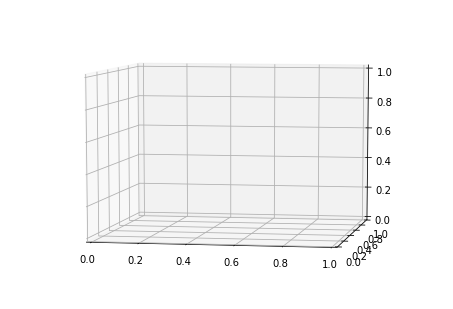

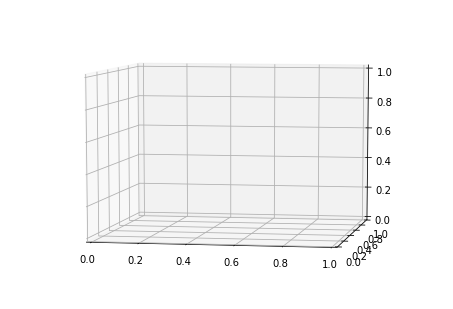

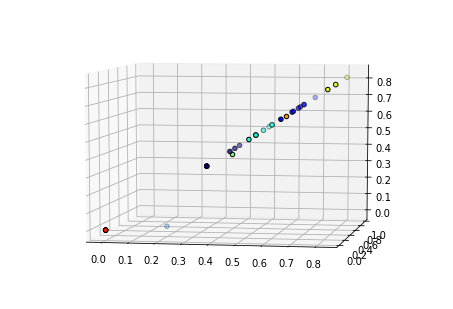

In [30]:
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(h_labels):
    ax.scatter(training_data[h_labels == l, 0], training_data[h_labels == l, 1], training_data[h_labels == l, 2],
               color=plt.cm.jet(float(l) / np.max(h_labels + 1)),
               s=20, edgecolor='k')

plt.show()

In [31]:
#testing
#
def getLabelsDict(set_labels, label_vals):
    labels_dict = {}
    ind = 0

    for i in range(0, len(set_labels)):
        labels_dict[i] = []
    #print len(set_lk)
    #print labels_dict
    for i in label_vals:
        #if i not in labels_dict.values:
        #print i
        labels_dict[i].append(ind)
        ind = ind + 1

    return labels_dict
    

In [32]:
colNames =  list(newdf.columns.values)
#print colNames
def findEle(index):
    #get all the colums corresponding to the particular row
    #colVals = df.loc[[index]]
    toRet = []
    likes = []
    dislikes = []
    for col in colNames:
        if not np.isnan(float(newdf.loc[[index]][col])):
            #print np.array(newdf.loc[[index]][col].astype(list))[1]
            for i in np.array(newdf.loc[[index]][col].astype(list)):
                #print type(i)
                if i == "1":
                    likes.append(col)
                else:
                    dislikes.append(col)
            
            #toRet.append(col)
    #print "likes: ", likes
    #print "dislikes: ", dislikes
    return (likes, dislikes)
    

TF-IDF

In [33]:
#compute tf-idf for the given array
#in Scikit-Learn
def tfIDF(array):
    sklearn_tfidf = TfidfVectorizer()#(stop_words = 'english')
    vec_representation = sklearn_tfidf.fit_transform(array)
    #print vec_representation
    return vec_representation

Cosine similarity

In [38]:
def cosine_computations(getLabelsDict, set_lk, label):
    userdata = {}
    for i in range(0, len(set_lk)):
        userdata[i] = {}
        for j in range(0, len(label)):
            userdata[i][j] = {}
            for k in range(0, len(label)):
                userdata[i][j][k] = ([],[])



    #1-------
    #         for like in likes:
    #             eachuserlike = []
    #             if not len(likes) == 0:
    #                 eachuserlike = like
    #             userdata.append(eachuserlike)


    #for each cluster
        #for each user in the cluster
            #get the liked recipes
            #get the disliked recipes
            #for each user not /= original 
                #get the liked recipes
                #get the disliked recipes
                #compare the recipes


    #for each cluster

    for key in labels_dict:
        #print "Key: ", key
        #for each user in the cluster
        for user1 in labels_dict[key]:
            likes1, dislikes1  = findEle(user1)
            #print "User1: ", user1
            #-----------1
            #go through every other user
            if not len(likes1) == 0 and not len(dislikes1) == 0:
                for user2 in labels_dict[key]:
                    #print "User2", user2
                    #get the likes and dislikes
                    likes2, dislikes2 = findEle(user2)

                    if not len(likes2) == 0 and not len(dislikes2) == 0:
                        #comparison of recipes
                        #for each recipe in first user's 
                        for like1 in tfIDF(likes1 + likes2)[0:len(likes1)]:
                            #for each recipe in second user's
                            for like2 in tfIDF(likes2 + likes1)[0:len(likes2)]:
                                #get the liked similarity and place in array
                                #cluster -> user1 -> user2 -> tuple of likes/dislikes -> liked comparison
                                userdata[key][user1][user2][0].append(cosine_similarity(like1, like2)) #likes


                        for dislike1 in tfIDF(dislikes1 + dislikes2)[0:len(dislikes1)]:
                            #for each recipe in second user's
                            for dislike2 in tfIDF(dislikes2 + dislikes1)[0:len(dislikes2)]:
                                #get the liked similarity and place in array
                                #cluster -> user1 -> user2 -> tuple of likes/dislikes -> disliked comparison
                                userdata[key][user1][user2][1].append(cosine_similarity(dislike1, dislike2)) #likes

    return userdata
        
                    #tfIDF(likes)

                    #print likes
            #print likes


            #print likes
            #print dislikes

In [39]:
def average_list_nan(data):
    average = float(0)
    counter = float(1)
    for el in data:
        if not np.isnan(float(el)):
            average += float(el)
            counter += 1
    return average/counter

In [40]:
def average_sim_cluster(userdata):
    #averages = [() for _ in range(len(userdata))]
    for cluster in userdata:
        averagelikes = float(0)
        averagedislikes = float(0)
        counter = float(1)
        
        for user1 in userdata[cluster]:
            for user2 in userdata[cluster]:
                averagelikes += average_list_nan(userdata[cluster][user1][user2][0])
                averagedislikes += average_list_nan(userdata[cluster][user1][user2][1])
                counter += 1
        #averages.append((averagelikes/counter, averagedislikes/counter))
        #return averages
        return (averagelikes/counter, averagedislikes/counter)

For k-means

In [41]:
#get the labels dictionary
labels_dict = getLabelsDict(set_lk, labels_kmeans)
#pass into cosine similarity computations
userdata = cosine_computations(labels_dict, set_lk, labels_kmeans)
# print userdata
print average_sim_cluster(userdata)

(0.003649975252150359, 0.0042594705430343315)


In [ ]:
#get the labels dictionary
labels_dict = getLabelsDict(set_ls, spectral_labels)
#pass into cosine similarity computations
userdata = cosine_computations(labels_dict, set_ls,spectral_labels )
# print userdata
print average_sim_cluster(userdata)

(0.00023437521332321892, 0.0006920415224913497)


In [ ]:
#get the labels dictionary
labels_dict = getLabelsDict(set_lh, h_labels)
#pass into cosine similarity computations
userdata = cosine_computations(labels_dict, set_lh, h_labels)
# print userdata
print average_sim_cluster(userdata)